In [3]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../scripts/")
import matplotlib.pyplot as plt
import numpy as np

import filenames
from hivevo.patients import Patient

import trajectory
from activity import get_activity

# Plotting activity for all patients

In [6]:
def average_activity(patient_names, region, normalize=True, remove_one_point_traj=False, min_freq=0.2):
    for patient_name in patient_names:
        patient = Patient.load(patient_name)

        time_bins, fixed, lost, active, sum = get_activity(patient, region, False, remove_one_point_traj, min_freq)
        if patient_name == patient_names[0]:
            tot_fixed = np.array(fixed)
            tot_lost = np.array(lost)
            tot_active = np.array(active)
            tot_sum = np.array(sum)
        else:
            tot_fixed += fixed
            tot_lost += lost
            tot_active += active
            tot_sum += sum

    if normalize:
        tot_fixed = np.array(tot_fixed) / tot_sum
        tot_lost = np.array(tot_lost) / tot_sum
        tot_active = np.array(tot_active) / tot_sum
        tot_sum = np.ones_like(tot_fixed)

    return time_bins, tot_fixed, tot_lost, tot_active, tot_sum

def plot_average_activity(region, time_bins, fixed, lost, active, sum, fontsize=16):
    plt.figure(figsize=(10,8))
    plt.title(f"Average activity region {region}", fontsize=fontsize)
    plt.plot(time_bins, fixed, label="fixed")
    plt.plot(time_bins, lost, label="lost")
    plt.plot(time_bins, active, label="active")
    if sum[0] != 1:
        plt.plot(time_bins, sum, label="sum")
    plt.legend(fontsize=fontsize)
    plt.xlabel("Time [days]", fontsize=fontsize)
    plt.ylabel("# Trajectories", fontsize=fontsize)
    plt.show()

# Region env

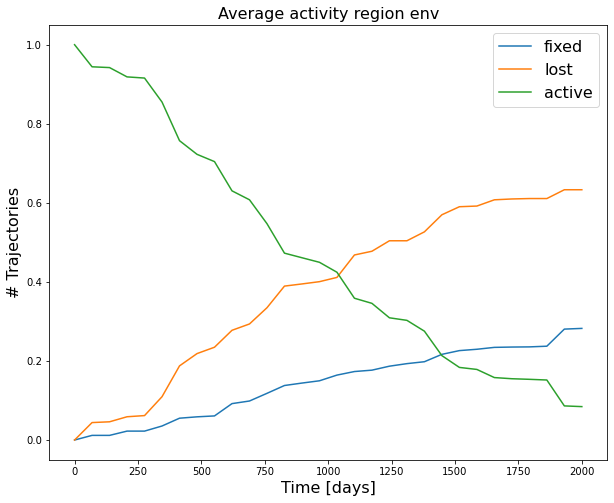

In [6]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Region pol

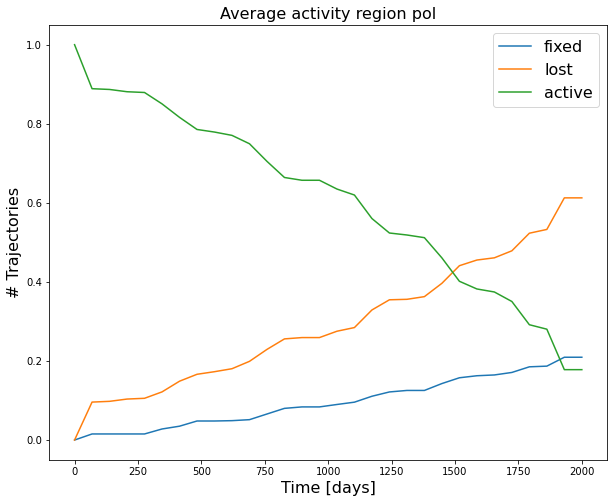

In [13]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "pol"
normalize = True
remove_one_point_traj = False

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Region gag

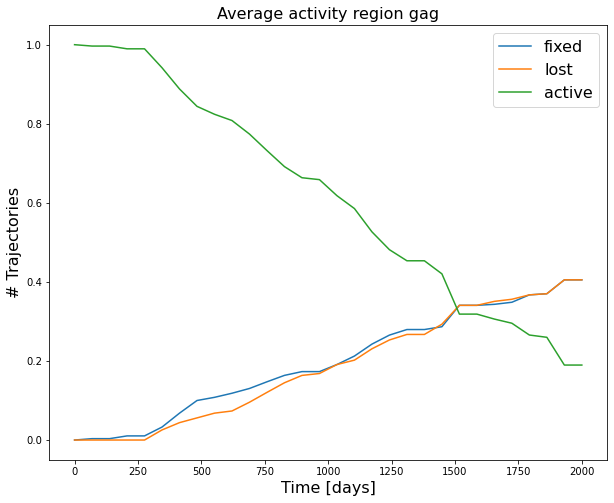

In [11]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "gag"
normalize = True
remove_one_point_traj = True

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

# Whole genome

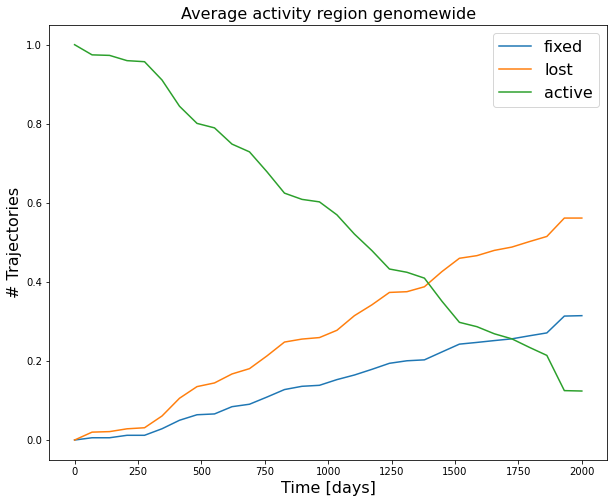

In [14]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "genomewide"
normalize = True
remove_one_point_traj = True

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

##################################################################
# Changing frequency range, env


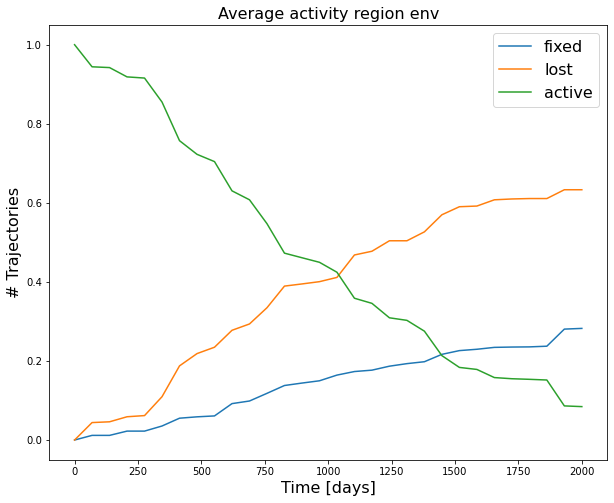

In [7]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.2

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

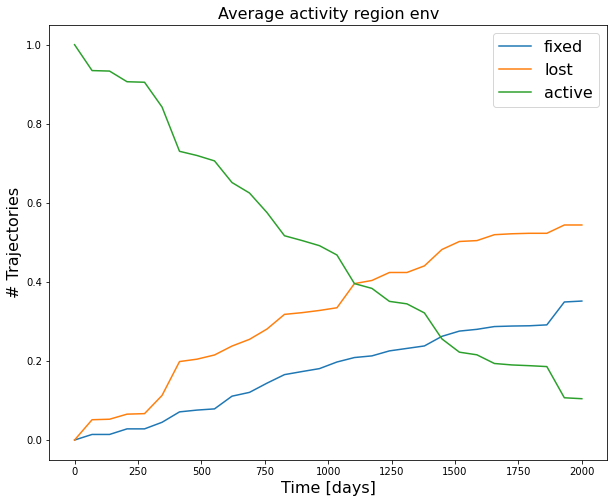

In [8]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.4

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

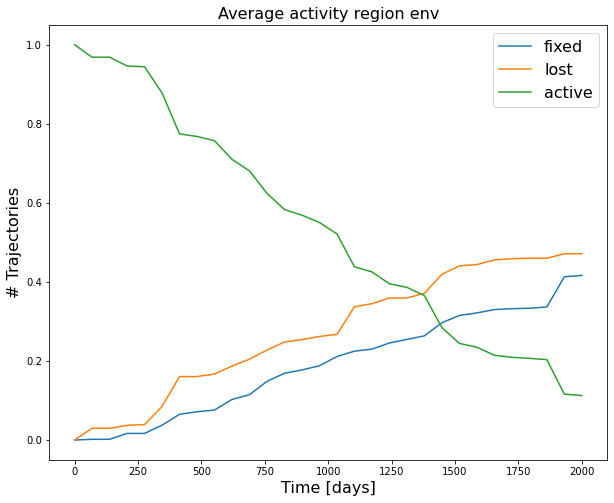

In [9]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.6

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)

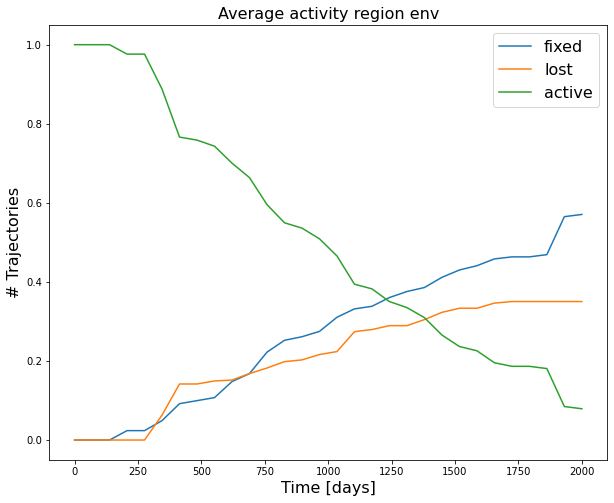

In [12]:
patient_names = ["p1", "p2", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
normalize = True
remove_one_point_traj = True
min_freq = 0.8

time_bins, fixed, lost, active, sum = average_activity(patient_names, region, normalize, remove_one_point_traj, min_freq)
plot_average_activity(region, time_bins, fixed, lost, active, sum)